 # Regresión Lineal
 
 
Profesores: Luz Eunice Angeles /José Ignacio Treviño

**Fecha:** septiembre 2021


# Regresión Líneal

---




Probablemente esté familiarizado con la forma más simple de un modelo de regresión lineal (ajustar una línea recta a los datos) pero dichos modelos se pueden extender para modelar un comportamiento de datos más complicado.


Comenzamos con las importaciones estándar:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Regresión lineal simple

Comenzaremos con la regresión lineal simple la cual consiste en un ajuste en línea recta a los datos.
Un ajuste la siguiente forma:
$$
y = ax + b
$$
Detalle:
 - $ a $ se conoce comúnmente como **pendiente**.
 - $ b $ se conoce comúnmente como **intersección**.

Considere los siguientes datos que están dispersos alrededor de una línea con una pendiente de 3 y una intersección de -10:

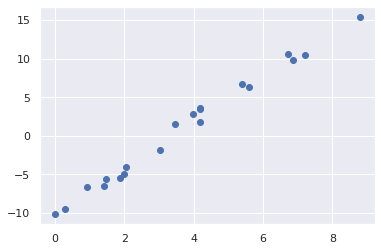

In [3]:
rng = np.random.RandomState(1)
n=20
x = 10 * rng.rand(n)
y = 3 * x - 10 + rng.randn(n)
plt.scatter(x, y);

Podemos usar el estimador de **regresión lineal** de Scikit-Learn para ajustar estos datos y construir la línea de mejor ajuste:

**Scikit-Learn** librería gratuitas para Python que cuenta con algoritmos de clasificación, regresión, clustering, entre otros.

In [46]:
x.shape

(20,)

In [47]:
xnew=x[:, np.newaxis]
xnew.shape

(20, 1)

**np.linspace** ( start, end , pts) en dónde : **star** es el valor de inicio, **end** es el valor fin y **pts** son los puntos que se generan entre el inicio y el final.

In [48]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

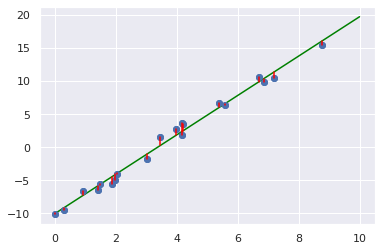

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="green");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");

**np.vstack:**Apilar matrices en secuencia vertical.

In [24]:
np.vstack([x,x])

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00],
       [4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00]])

In [32]:
y

array([  3.64442958,  10.50984354, -10.16899696,  -1.80788124,
        -5.55510953,  -6.64702694,  -5.51281284,   1.51154552,
         2.80461495,   6.66699636,   3.47669138,   9.87285715,
        -3.98932273,  15.40775366,  -9.44626028,  10.64438077,
         1.82748332,   6.36394133,  -6.47556454,  -4.90216097])

Datos de y : en la predicción

In [34]:
 model.predict(x[:, np.newaxis])

array([  2.39152056,  11.41750172, -10.01523691,  -1.02152316,
        -5.65133087,  -7.27073561,  -4.47572148,   0.26490383,
         1.78876582,   6.01601087,   2.45617229,  10.37281196,
        -3.93434447,  16.11326316,  -9.20361298,   9.93380736,
         2.39993634,   6.60741445,  -5.84086457,  -4.1233368 ])

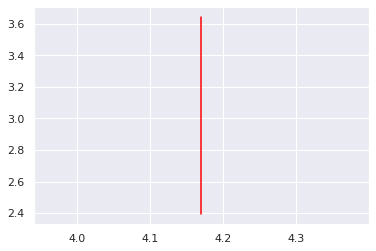

In [45]:
plt.plot( [[4.17022005],[4.17022005]], [[3.64442958],[2.39152056]] , color="red")



Para obtener los parametros de la recta se intenta minimizar la suma de errores cuadrados $\sum_i (y[i] - \hat{y}[i])^2$; esta es la suma de las longitudes cuadradas de los segmentos de la línea roja en el gráfico anterior. Los valores estimados $\hat{y}[i]$  se indican con `yfit [i]` en el código anterior.

La pendiente y la intersección de los datos están contenidos en los parámetros de ajuste del modelo, que en Scikit-Learn siempre están marcados con un guión bajo al final.

In [49]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.9759007928292
Model intercept: -10.018640586908093


Los resultados que encontramos son muy buenos.


Sin embargo, el estimador de `` regresión lineal '' es mucho más capaz que esto; además de ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \ cdots
$$
donde hay varios valores $ x $.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones más altas.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción construyendo algunos datos de ejemplo, usando el operador de multiplicación de matrices de NumPy:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000051
[ 1.5 -2.   1. ]



Aquí, los datos $ y $ se construyen a partir de tres valores $ x $ aleatorios, y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos usar el estimador único de `` Regresión lineal '' para ajustar líneas y planos.

## Regresión de función básica

Un truco que puede utilizar para adaptar la regresión lineal a relaciones no lineales es transformar los datos de acuerdo con * funciones de base *.


La idea es tomar nuestro modelo lineal multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \ cdots
$$
y construir $ x_1, x_2, x_3, $ y así sucesivamente, a partir de nuestra entrada unidimensional $ x $.
Es decir, dejamos $ x_n = f_n (x) $, donde $ f_n () $ es alguna función que transforma nuestros datos.

Por ejemplo, si $ f_n (x) = x ^ n $, nuestro modelo se convierte en una regresión polinomial:
$$
y = a_0 + a_1 x + a_2 x ^ 2 + a_3 x ^ 3 + \ cdots
$$


### Funciones de base polinomial

Esta proyección polinomial es lo suficientemente útil como para estar integrada en Scikit-Learn, utilizando el transformador ''PolynomialFeatures '':

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos aquí que el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor.

Hagamos un modelo polinomial de séptimo grado de esta manera:

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
poly_model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model_5 = make_pipeline(PolynomialFeatures(5), LinearRegression())

Con esta transformación en su lugar, podemos usar el modelo lineal para ajustar relaciones mucho más complicadas entre $ x $ y $ y $.
Por ejemplo, aquí hay una onda sinusoidal con ruido:

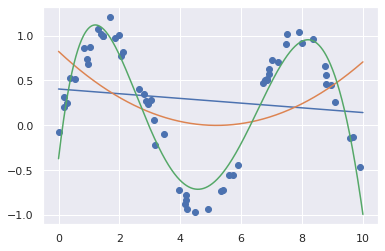

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = np.sin(x) + 0.1 * rng.randn(60)

##1
poly_model_1.fit(x[:, np.newaxis], y)
yfit_1 = poly_model_1.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit_1);

##2
poly_model_2.fit(x[:, np.newaxis], y)
yfit_2 = poly_model_2.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit_2);


##5

poly_model_5.fit(x[:, np.newaxis], y)
yfit_5 = poly_model_5.predict(xfit[:, np.newaxis])

plt.plot(xfit, yfit_5);


In [ ]:
print('*********1- Coeficientes***************')
print(poly_model_1.steps[1][1].coef_)
print('*********1- Intercepcion ***************')
print(poly_model_1.steps[1][1].intercept_)
print('****************************************')


print('*********2- Coeficientes***************')
print(poly_model_2.steps[1][1].coef_)
print('*********5- Intercepcion ***************')
print(poly_model_2.steps[1][1].intercept_)
print('****************************************')


print('*********5- Coeficientes ***************')
print(poly_model_5.steps[1][1].coef_)
print('*********5- Intercepcion ***************')
print(poly_model_5.steps[1][1].intercept_)
print('****************************************')

*********1- Coeficientes***************
[ 0.         -0.02623255]
*********1- Intercepcion ***************
0.40488707044966143
****************************************
*********2- Coeficientes***************
[ 0.         -0.31769105  0.03059857]
*********5- Intercepcion ***************
0.8241506472771867
****************************************
*********5- Coeficientes ***************
[ 0.00000000e+00  2.90076487e+00 -1.77603804e+00  3.61470476e-01
 -2.84972988e-02  7.14775629e-04]
*********5- Intercepcion ***************
-0.371747676661392
****************************************


Nuestro modelo lineal, mediante el uso de funciones de base polinomial de séptimo orden, puede proporcionar un ajuste excelente a estos datos no lineales


Referencias: 

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*